# Analyzing Reddit Content Growth

In this notebook we study different aspects of content growth and rates in Reddit. Our focus is to compare that of Switzerland associated subreddites with other european countries.

We have three sets of data: UK, EUROPE, SWITZERLAND. We will import and process them independently, EUROPE splitted in Germany, France, Italy, Spain. Finally we will proceed to make the analysis

In [1]:
# Import Libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from datetime import datetime
import os
import glob

In [2]:
# Load data

# Europe
path = "../data/reddit_europe_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_eu = pd.concat((pd.read_csv(f) for f in all_files))

#UK
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_uk = pd.concat((pd.read_csv(f) for f in all_files))

#Switzerland
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
df_ch = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
df_eu.columns

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'created', 'created_utc',
       'disable_comments', 'distinguished', 'domain', 'downs', 'edited',
       'from', 'from_id', 'from_kind', 'gilded', 'hide_score', 'href_url',
       'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text',
       'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'third_party_tracking', 'third_party_tracking_2',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

In [4]:
## Separate Europe

# Declare lists of subreddits for different countries
de_subreddits = ['germany', 'de', 'German', 'GermanPractice', 'GermanFacts', 'GermanConversation', 'SCHLAND',
                 'germanyusa', 'DEjobs', 'bundesliga', 'GermanyPics', 'germusic', 'de_punk', 'germanrap', 'NDH']

fr_subreddits = ['blagues', 'cinemacinema', 'france', 'FrancePics', 'frenchelectro', 'Frenchhistory',
                 'guessthefrenchmovie', 'Ligue1', 'Livres', 'musiquefrancaise', 'paris', 'pedale', 'philosophie',
                 'Politique', 'rance', 'ScienceFr', 'SocialFrance']

it_subreddits = ['Calcio', 'ITAGLIA', 'Italianhistory', 'ITALIANMUSIC', 'italy', 'ItalyPhotos', 'Libri', 'Abruzzo',
                 'Apulia', 'bari', 'Basilicata', 'bologna', 'Calabria', 'Campania', 'Catania', 'emilia_romagna',
                 'firenze', 'friuli', 'Genova', 'Italia', 'lazio', 'Liguria', 'lombardia', 'Lombardy', 'marche',
                 'messina', 'milano', 'Modena', 'molise', 'Naples_Italy', 'napoli', 'padova', 'Palermo', 'Perugia',
                 'Piedmont', 'piemonte', 'Pisa', 'puglia', 'roma', 'rome', 'romesocialclub', 'Sardegna', 'Sardinia',
                 'Sicilia', 'sicily', 'Siracusa', 'torino', 'Toscana', 'trentino_alto_adige', 'trentod', 'Trieste',
                 'tuscany', 'Umbria', 'valle_daosta', 'Veneto', 'Venezia']

es_subreddits = ['Barcelona', 'EPANA', 'es', 'futbol', 'Granada', 'LaLiga', 'Madrid', 'spain', 'Andalucia', 'SpanishHistory']

# Filter
df_eu = df_eu.set_index('subreddit')
df_de = df_eu.ix[de_subreddits,:].reset_index()
df_fr = df_eu.ix[fr_subreddits,:].reset_index()
df_it = df_eu.ix[it_subreddits,:].reset_index()
df_es = df_eu.ix[es_subreddits,:].reset_index()

In [5]:
## Add COUNTRY field and merge data

df_ch['Country'] = 'CH'
df_uk['Country'] = 'UK'
df_de['Country'] = 'DE'
df_fr['Country'] = 'FR'
df_it['Country'] = 'IT'
df_es['Country'] = 'ES'

df = pd.concat([df_ch,df_uk,df_de,df_fr,df_it,df_es])

In [6]:
df.shape

(801615, 51)

We will be analyzing a total of **801615** threads across all the countries mentioned

## 1. On Data Volume by country

To start making sense of the data we have, we wonder how much belongs to each country. Following results are for accumulated values up to 2015.

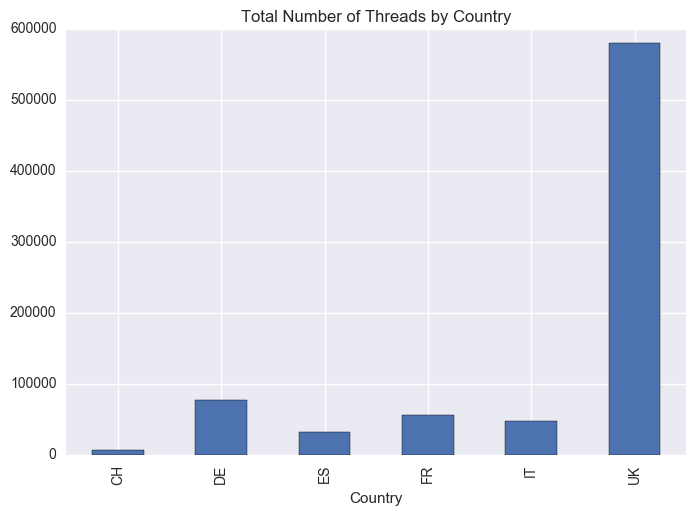

In [7]:
df_count_by_country = df.groupby('Country').count()
df_count_by_country.created.plot(kind='bar', title='Total Number of Threads by Country')

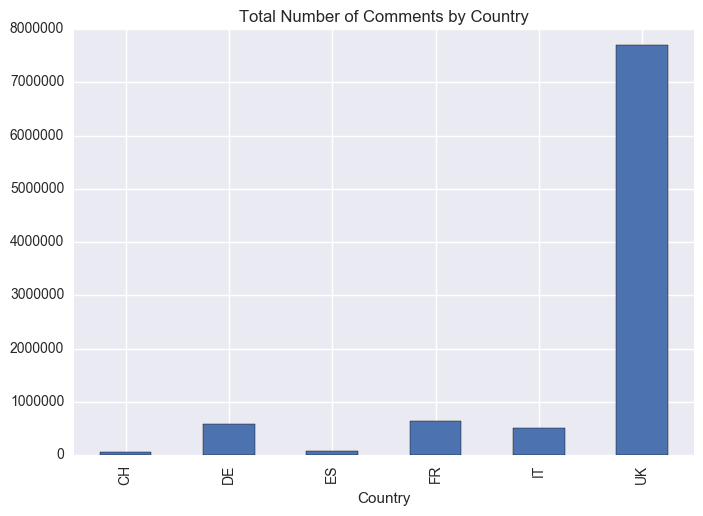

In [8]:
df_comments_by_country = df.groupby('Country')['num_comments'].sum()
df_comments_by_country.plot(kind='bar', title='Total Number of Comments by Country')

We observe how UK widely dominates both graphs, number of threads and number of comments. Switzerland, being the smallest of these countries, is justifiably behind.

To make the graph fair, we decide to rectify the values according to an estimate of the country's population.


**DISCLAIMER:** We have gathered the data from http://data.worldbank.org/

In [9]:
# Load population data from file
df_population = pd.read_csv('population_data.csv').set_index('Country Name')
df_population.head()

,﻿Series Name,Series Code,Country Code,1990 [YR1990],2000 [YR2000],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
Country Name,,,,,,,,,,,,,,,
Afghanistan,"Population, total",SP.POP.TOTL,AFG,12067570,19701940.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803,30682500,31627506,32526562,..
Albania,"Population, total",SP.POP.TOTL,ALB,3286542,3089027.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247,2896652,2893654,2889167,..
Algeria,"Population, total",SP.POP.TOTL,DZA,25912364,31183658.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427,38186135,38934334,39666519,..
American Samoa,"Population, total",SP.POP.TOTL,ASM,47044,57522.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227,55302,55434,55538,..
Andorra,"Population, total",SP.POP.TOTL,ADO,54511,65399.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316,75902,72786,70473,..


In [10]:
# Extract wanted data
df_population_selection = df_population.ix[['Switzerland','United Kingdom','Germany','France','Italy','Spain'],['2015 [YR2015]']]
df_population_selection = df_population_selection.reset_index()

# Rename index
df_population_selection = df_population_selection.drop('Country Name',axis=1)
df_population_selection['Country'] = ['CH','UK','DE','FR','IT','ES']
df_population_selection = df_population_selection.set_index('Country')

df_population_selection

,2015 [YR2015]
Country,
CH,8286976
UK,65138232
DE,81413145
FR,66808385
IT,60802085
ES,46418269


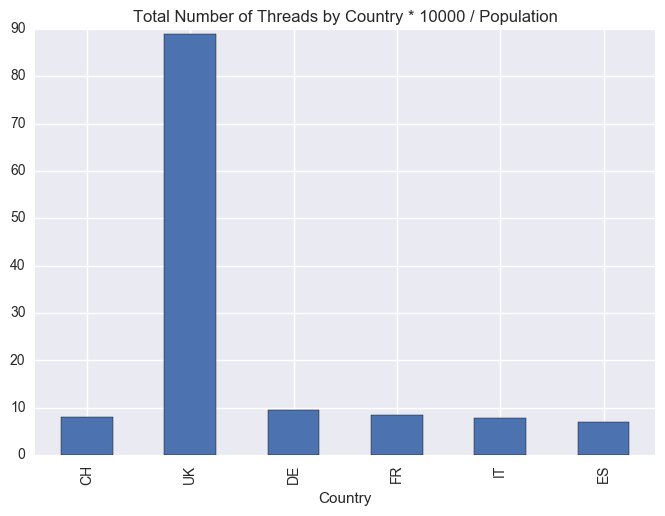

In [11]:
# Rectify values and plot again

df1 = df_count_by_country.merge(df_population_selection, left_index=True, right_index=True)
df2 = df1.created / df1['2015 [YR2015]'].astype('int') * 10000

df2.plot(kind='bar', title='Total Number of Threads by Country * 10000 / Population')

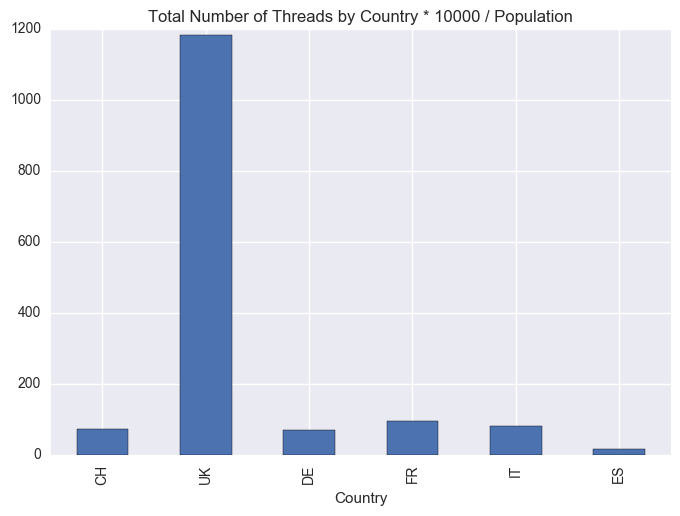

In [12]:
df_comments_by_country = pd.DataFrame(df_comments_by_country)
df1 = df_comments_by_country.merge(df_population_selection, left_index=True, right_index=True)
df2 = df1.num_comments / df1['2015 [YR2015]'].astype('int') * 10000
df2.plot(kind='bar', title='Total Number of Threads by Country * 10000 / Population')

The correction by population (total on 2015) makes the activity of switzerland comparable to that of other european countries. UK maintains a distant lead.

## 2. On time evolution of Reddit activity

We are interested to see how growth of user's activity in Reddit has evolved through the years

In [13]:
df = df.dropna(axis=0,subset=['created_utc'])
dates = [str(datetime.fromtimestamp(t).year) for t in df['created_utc'].astype(int)]
df.loc[:,'dates'] = dates
df.loc[:,'count'] = 1
dfs = df.ix[:,['dates','Country','count','num_comments']]
df_by_country_by_year = dfs.groupby(['Country','dates']).sum()
df_by_country_by_year.loc[:,'population'] = 0
df_by_country_by_year.head()

count  num_comments  population
Country dates                                 
CH      2008     179          12.0           0
        2009     198          29.0           0
        2010      98         472.0           0
        2011     334        2885.0           0
        2012     727        6661.0           0

In [14]:
df_by_country_by_year2 = df_by_country_by_year.copy()
list_country_names = ['Switzerland','United Kingdom','Germany','France','Italy','Spain']
list_country_codes = ['CH','UK','DE','FR','IT','ES']
list_years = ['2008','2009','2010','2011','2012','2013','2014','2015']

for i in range(len(list_country_names)):
    for year in list_years:
        population = df_population.ix[list_country_names[i] ,year + ' [YR' + year +']']
        df_by_country_by_year2.loc[(list_country_codes[i], year), 'population'] = int(population)
        
df_by_country_by_year2 = df_by_country_by_year2.query('population > 0')
df_by_country_by_year2

count  num_comments  population
Country dates                                  
CH      2008      179          12.0     7647675
        2009      198          29.0     7743831
        2010       98         472.0     7824909
        2011      334        2885.0     7912398
        2012      727        6661.0     7996861
        2013     1423       13727.0     8089346
        2014     1931       20473.0     8188649
        2015     1762       17353.0     8286976
DE      2008     3384        1451.0    82110097
        2009     3889        2707.0    81902307
        2010     3339        3834.0    81776930
        2011     4987       20318.0    81797673
        2012     9173       59049.0    80425823
        2013    12915       96148.0    82132753
        2014    19886      176574.0    80982500
        2015    19783      219102.0    81413145
ES      2008     3317        1569.0    45954106
        2009     3351         720.0    46362946
        2010      967         549.0    46576897
        2011     1449        4195.0    46742697
        2012     3269       11314.0    46773055
        2013     5199       19002.0    46620045
        2014     7756       27829.0    46480882
        2015     6739       22268.0    46418269
FR      2008      179         103.0    64374990
        2009      913         362.0    64707044
        2010     1588        2668.0    65027512
        2011     3804       16628.0    65342776
        2012     6677       43640.0    65659790
        2013     9414       71530.0    65972097
        2014    16219      172371.0    66495940
        2015    18507      328116.0    66808385
IT      2008      496          98.0    58826731
        2009     3681         470.0    59095365
        2010     4989         455.0    59277417
        2011     1690        4709.0    59379449
        2012     2951       16226.0    59539717
        2013     7356       84649.0    60233948
        2014    13299      190584.0    60789140
        2015    13947      204854.0    60802085
UK      2008      680         812.0    61806995
        2009     3529        8552.0    62276270
        2010    12312       93589.0    62766365
        2011    50051      518490.0    63258918
        2012    99303     1113168.0    63700300
        2013   132277     1698755.0    64128226
        2014   156124     2302847.0    64613160
        2015   125370     1968140.0    65138232

In [15]:
# Create Json -> CUSTOM LOOP BECAUSE THE DATA NEEDS A VERY PARTICULAR FORMAT

j = '['
for c in list_country_codes:
    j = j + '{"name":"' + c + '","region:"' + c + '",'
    for n in df_by_country_by_year2.columns:
        j = j + '"' + n + '":['
        for y in list_years:
            j = j + '[' + str(y) + ',' + str(df_by_country_by_year2.loc[(c,y),n]) + '],'
        j = j[0:-1] + '],'   
    j = j[0:-1] + '},'
j = j[0:-1] + ']'

print(j)

[{"name":"CH","region:"CH","count":[[2008,179.0],[2009,198.0],[2010,98.0],[2011,334.0],[2012,727.0],[2013,1423.0],[2014,1931.0],[2015,1762.0]],"num_comments":[[2008,12.0],[2009,29.0],[2010,472.0],[2011,2885.0],[2012,6661.0],[2013,13727.0],[2014,20473.0],[2015,17353.0]],"population":[[2008,7647675.0],[2009,7743831.0],[2010,7824909.0],[2011,7912398.0],[2012,7996861.0],[2013,8089346.0],[2014,8188649.0],[2015,8286976.0]]},{"name":"UK","region:"UK","count":[[2008,680.0],[2009,3529.0],[2010,12312.0],[2011,50051.0],[2012,99303.0],[2013,132277.0],[2014,156124.0],[2015,125370.0]],"num_comments":[[2008,812.0],[2009,8552.0],[2010,93589.0],[2011,518490.0],[2012,1113168.0],[2013,1698755.0],[2014,2302847.0],[2015,1968140.0]],"population":[[2008,61806995.0],[2009,62276270.0],[2010,62766365.0],[2011,63258918.0],[2012,63700300.0],[2013,64128226.0],[2014,64613160.0],[2015,65138232.0]]},{"name":"DE","region:"DE","count":[[2008,3384.0],[2009,3889.0],[2010,3339.0],[2011,4987.0],[2012,9173.0],[2013,12915.0]

In [16]:
with open("nations.json", "w") as text_file:
    text_file.write(j)